# Trabalho 02

## Sobre o dataset

O dataset usado contém informações voos sobre passageiros de uma CIA áerea, com 27 features. Para usá-lo nesse trabalho de clusterização foi-se descartado o rótulo.

- ID: Identificador único de passageiro
- Gender: Sexo do passageiro (feminino/masculino)
- Age: Idade do passageiro
- Customer Type: Tipo de cliente da companhia aérea (Primeira vez/Retornando)
- Type of Travel: Objetivo do voo (Negócios/Pessoal)
- Class: Classe de viagem no avião para o banco do passageiro
- Flight Distance: Distância de voo em milhas
- Departure Delay: Atraso de partida do voo em minutos
- Arrival Delay: Atraso na chegada do voo em minutos
- Departure and Arrival Time Convenience: "Nível de satisfação com a conveniência dos horários de partida e chegada do voo de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- Ease of Online Booking: "Nível de satisfação com a experiência de reserva online de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- Check-in Service: "Nível de satisfação com o serviço de check-in de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- Online Boarding: "Nível de satisfação com a experiência de embarque online de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- Gate Location: "Nível de satisfação com a localização do portão no aeroporto de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- On-board Service: "Nível de satisfação com o serviço de embarque no aeroporto de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- Seat Comfort: "Nível de satisfação com o conforto do assento do avião de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- Leg Room Service: "Nível de satisfação com o espaço para as pernas do assento do avião de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- Cleanliness: "Nível de satisfação com a limpeza do avião de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- Food and Drink: "Nível de satisfação com os alimentos e bebidas no avião de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- In-flight Service: "Nível de satisfação com o serviço de bordo de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- In-flight Wifi Service: "Nível de satisfação com o serviço Wifi a bordo de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- In-flight Entertainment: "Nível de satisfação com o entretenimento a bordo de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- Baggage Handling: "Nível de satisfação com o manuseio de bagagem da companhia aérea de 1 (mais baixo) a 5 (mais alto) - 0 significa ""não aplicável"""
- Satisfaction: Nível de satisfação geral com a companhia aérea (satisfeito/neutro ou insatisfeito)


## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

## Importando os dados

As colunas ID e Satisfaction são descartadas, pois não são necessarias para a clusterização.

In [2]:
df = pd.read_csv('../datasets/airline_passenger_satisfaction.csv').drop(['ID', 'Satisfaction'], axis='columns')

In [3]:
df.dropna(axis='index',inplace=True)

In [4]:
X = df.iloc[:5000,:].values

### Apresentando dos dados

In [5]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,3,5,2,5,5,5,3,5,5
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,2,5,4,5,5,3,5,2,5,5
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,4,3,5,3,5,5,3,4,3,3
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,2,5,5,5,4,4,5,2,5,5
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,3,4,4,5,4,3,3,3,3


### Padronização dos dados

In [6]:
pre_std = ColumnTransformer(transformers=[
  ('cat', OneHotEncoder(sparse=False), [0, 2, 3, 4]),
  ('num', StandardScaler(), [x for x in range(22) if x not in [0, 2, 3, 4]])
], remainder='passthrough')

In [7]:
pre = ColumnTransformer(transformers=[
  ('cat', OneHotEncoder(sparse=False), [0, 2, 3, 4])
], remainder='passthrough')

In [8]:
X = pre.fit_transform(X)

In [9]:
X_std = pre_std.fit_transform(X)

### Redução de dimensionalidade

Para que visualizemos os dados é necessário que seja feita uma redução de dimensionalidade do dataset. E, para esse processo é recomendável que padronizemos os dados.

In [10]:
pca_std = PCA(n_components=2)
X_std_2d = pca_std.fit_transform(X_std)

In [11]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_std)

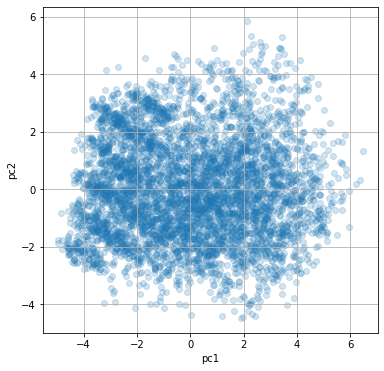

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.scatter(x=X_std_2d[:,0], y=X_std_2d[:,1], alpha=0.2)
ax.grid()

## Kmeans com dados padronizados

### Metodo do cutuvelo

In [13]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_std)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

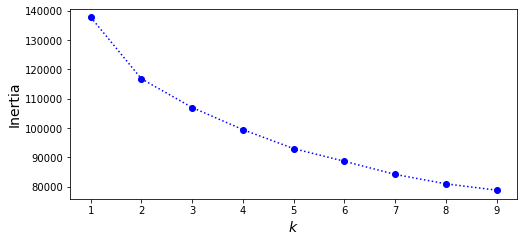

In [14]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo:")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Por esse metodo vemos que 2,3,4 são bons canditados ao número de clusters (k)

### Metodo da silhueta

In [15]:
silhouettes = [silhouette_score(X_std, kmeans.labels_) for kmeans in kmeans_per_k[1:] ]

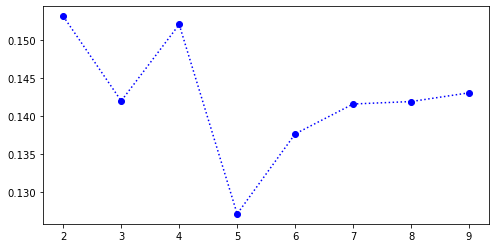

In [16]:
fig = plt.figure(figsize=(8,4))
plt.plot(list(range(2,10)), silhouettes, 'bo:')

Por esse metodo vemos que o melhor numero de clusters (k) é 2

## Kmeans sem padronização

### Metódo do cutuvelo

In [17]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

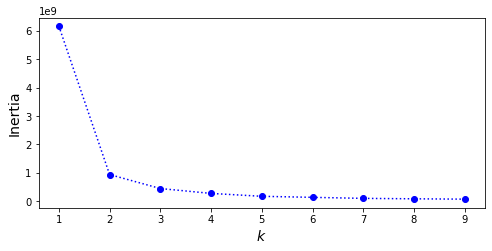

In [18]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo:")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Sem a padronização fica mais claro que 2 é o numero ideal de k

### Metódo da silhueta

In [19]:
silhouettes = [silhouette_score(X, kmeans.labels_) for kmeans in kmeans_per_k[1:] ]

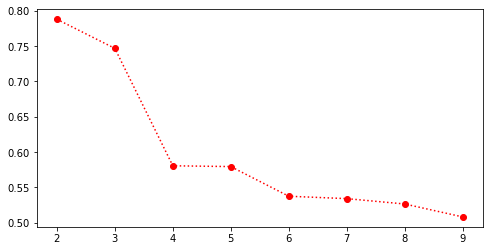

In [20]:
fig = plt.figure(figsize=(8,4))
plt.plot(list(range(2,10)), silhouettes, 'ro:')

Por esse metodo, novamente, de forma mais clara, vemos que o melhor numero de clusters (k) é 2

### Visualização com o melhor k

In [21]:
kmeans_std = KMeans(n_clusters=2, random_state=42)

In [22]:
labels_std = kmeans_std.fit_predict(X_std)

In [23]:
kmeans_std.inertia_

116752.83624570246

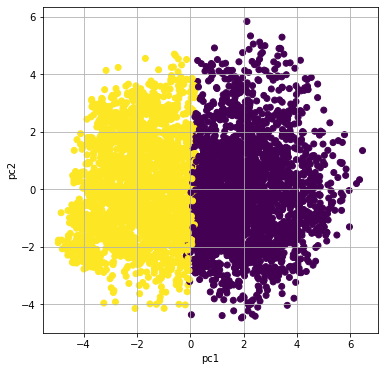

In [24]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
plt.scatter(X_std_2d[:, 0], X_std_2d[:, 1], c=labels_std)
ax.grid()

In [25]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [26]:
labels = kmeans.fit_predict(X)

In [27]:
kmeans.inertia_

935410630.1339263

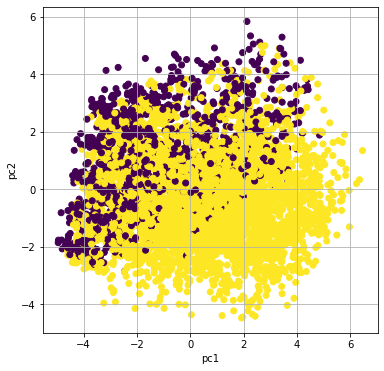

In [28]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
ax.grid()

## DBSCAN

In [29]:
def plot_db_clusters(db,X, show_noise = True):
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(db.labels_)

    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
    
    for k,col in zip(unique_labels,colors):
      if k == -1:
          if not show_noise:
            continue
          # Ruído tem a cor preta
          col = 'k'
      
      class_member_mask = (db.labels_ == k)
      xy = X[class_member_mask & core_samples_mask]
      plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize=14)
      xy=X[class_member_mask & ~core_samples_mask]
      plt.plot(xy[:,0], xy[:,1], 'o',markerfacecolor=col, markeredgecolor='k',markersize=6)
    
    plt.title('Número de Clusters:%d' % n_clusters)

### Com padronização

In [30]:
#dbscan = DBSCAN(eps=2, min_samples=10, n_jobs=-1)
dbscan = DBSCAN(eps=4,n_jobs=-1)
db = dbscan.fit(X_std)
labels = set(db.labels_)
labels

{-1, 0, 1}

In [31]:
silhouette_score(X_std, db.labels_)

0.16344244964153173

### Plotando com ruído

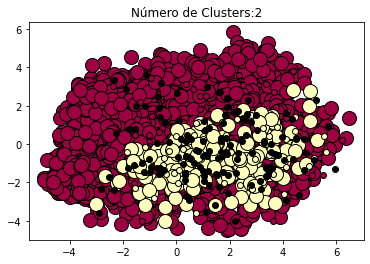

In [32]:
plot_db_clusters(db, X_std_2d)

### Plotando sem ruído

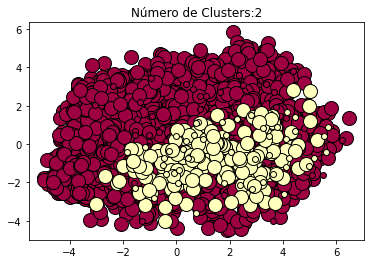

In [33]:
plot_db_clusters(db, X_std_2d, False)

### Sem padronização

In [34]:
dbscan = DBSCAN(eps=126,n_jobs=-1)
db = dbscan.fit(X)
labels = set(db.labels_)
labels

{-1, 0, 1}

### Plotando com ruído

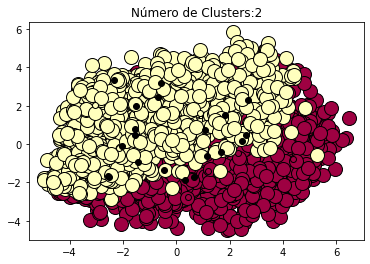

In [35]:
plot_db_clusters(db, X_2d)

### Plotando sem ruído

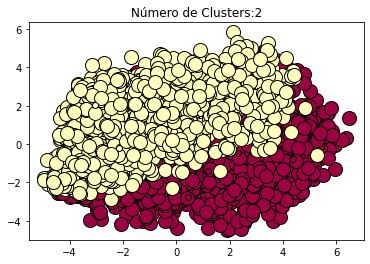

In [36]:
plot_db_clusters(db, X_2d, False)

## Clusterização hierárquica

### Dendrograma

#### Padronizado

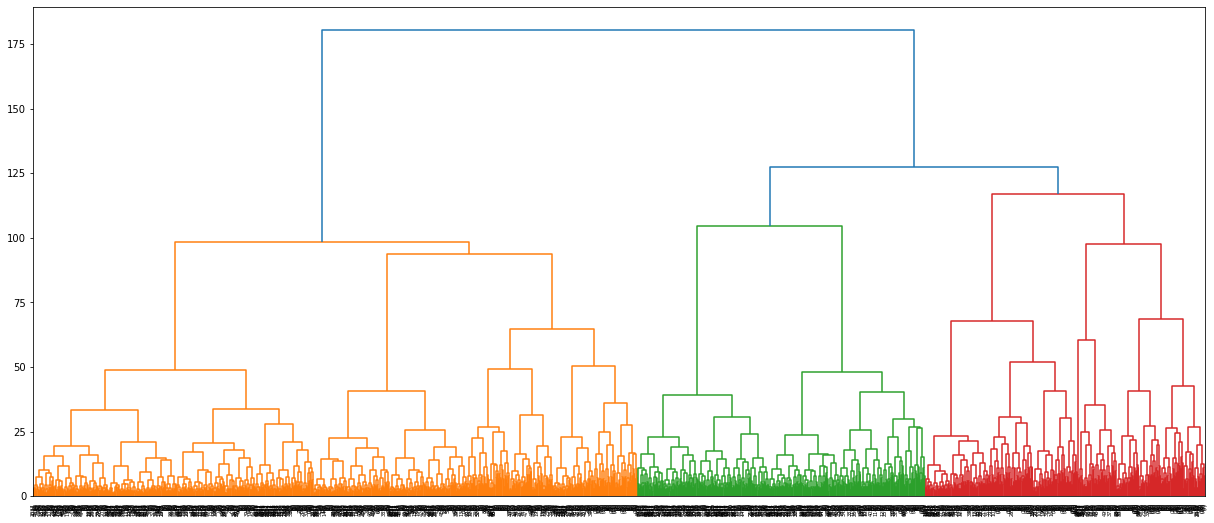

In [37]:
fig = plt.figure(figsize=(21,9))
dendrogram(linkage(X_std, method='ward'), truncate_mode='level', p=10)
plt.show()

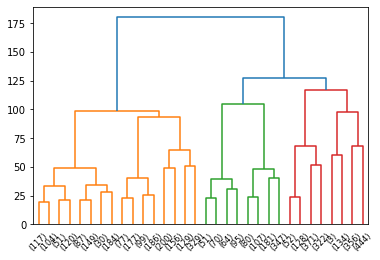

In [38]:
dendrogram(linkage(X_std, method='ward'), truncate_mode='level', p=4)
plt.show()

#### Não padronizado

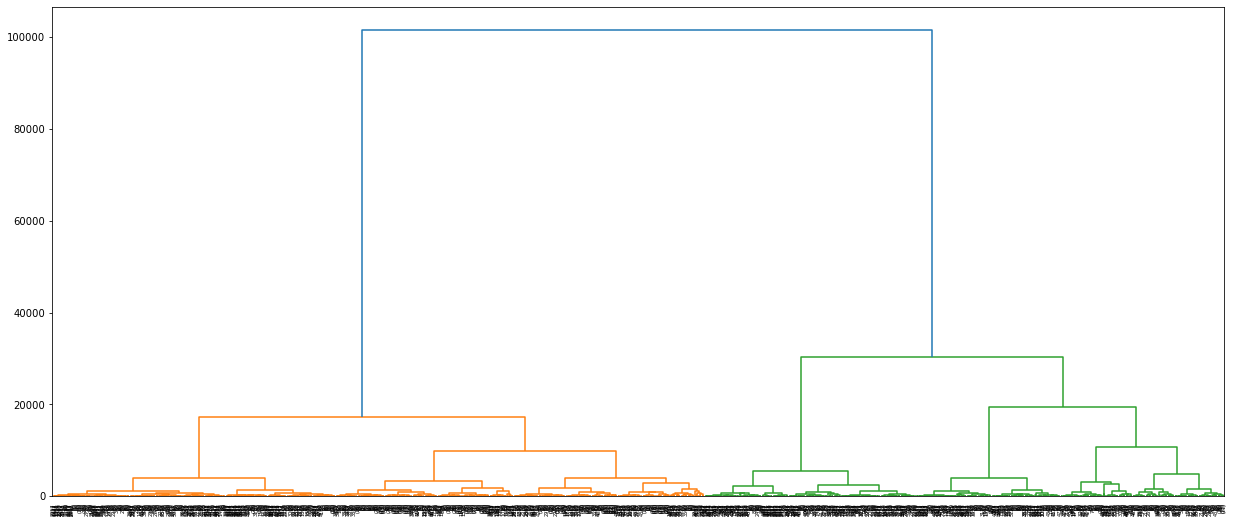

In [39]:
fig = plt.figure(figsize=(21,9))
dendrogram(linkage(X, method='ward'), truncate_mode='level', p=10)
plt.show()

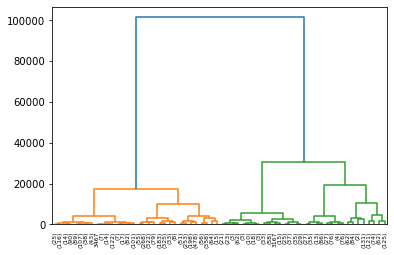

In [40]:
dendrogram(linkage(X, method='ward'), truncate_mode='level', p=5)
plt.show()

### Clusterização Aglomerativa com dados padronizados

In [41]:
aggl = AgglomerativeClustering(n_clusters=None, distance_threshold=150)

In [42]:
labels = aggl.fit_predict(X_std)

In [43]:
silhouette_score(X_std, labels)

0.11475537166754518

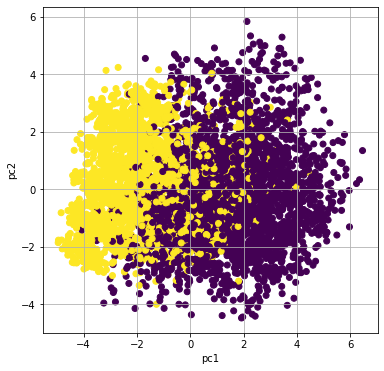

In [44]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
plt.scatter(X_std_2d[:, 0], X_std_2d[:, 1], c=labels)
ax.grid()

### Clusterização Aglomerativa sem padronização dos dados

In [45]:
aggl = AgglomerativeClustering(n_clusters=None, distance_threshold=40000)

In [46]:
labels = aggl.fit_predict(X)

In [47]:
silhouette_score(X, labels)

0.7785902932354857

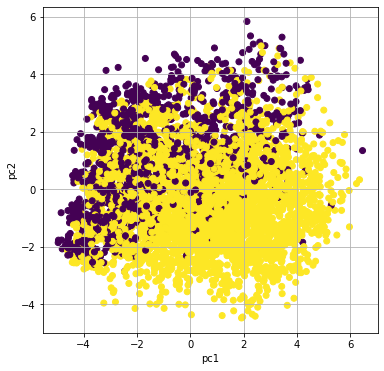

In [48]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
ax.grid()

## Análise

Como os rótulos do dataset são conhecidos, podemos inferir o melhor k=2 refere-se aos clientes satisfeitos e neutros.